<h1>EC704 VLSI Design Automation</h1>
<h2>Assignment 1</h2>
<h3>Submitted To:</h3>

<h3>Question</h3>
<p>
Given: An array of rectangles in the file test_data.txt.


The following is the format of the representation of rectangle:

{rectangle_id, left_bottom_corner_x_coordinate, left_bottom_corner_y_coordinate, right_top_corner_x_coordinate, right_top_corner_y_coordinate}. 


Develop python codes in modular fashion to perform the following functions:
Read data corresponding to the rectangular objects from the file test_data.txt. Using matplotlib or any other suitable library plot the given objects in Jupyter IDE.

Read the test data from a file "test_data.txt". Display the rectangle/s graphically in the Jupyter IDE. 



Problems to be solved using Python:

Q1) Accept input {x, y} from the keyboard. Print if this point lies within any of the rectangles in the given test data set. If yes then list the rectangles enclosing the given point in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id}. Eg: {1, 5, 8} implies that given point(x, y) is enclosed in the rectangles 1, 5 and 8.

Q2) List of rectangles that don't overlap any other rectangles. The output should be in the format {rectangle_id, rectangle_id, rectangle_id, ... rectangle_id} 

Q3) List of rectangles that overlap with other rectangles in the format {{rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}, ..... {rectangle_id, list_of_rectangle_ids_which_are_overlapping_with_it}}
Eg: {{5, 7, 9, 12}, {6, 10, 12}} implies that rectangle 5 overlaps with rectangles 7, 9 and 12; rectangle 6 overlaps with rectangles 10 and 12.

Q4) List of rectangles that contain other rectangles in the format {rectangle_id, list_of_rectangle_ids_which_are_contained_in}
Eg: {{5, 2, 6}, {4, 3, 9}} implies that rectangle 5 contains rectangles 2 and 6; rectangle 4 contains rectangles 3 and 9.

Q5) List the rectangles that are abutting each other in the following format {rectangle_id, which side_(e, w, n, s), rectangle_id_of_abutting_rectangle_id}
Eg: {{5, n, 7}, {4, e, 3}} implies that rectangle 5 has rectangle 7 abutting it on the northern side, rectangle 4 has rectangle 3 abutting it on the eastern side.


</p>


In [317]:
#importing required Libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

In [318]:
#to create and return read_data which contains each rectangle as an object
def create_read_data(d):
  #creating an empty list for storing the instatianted rectangles
  temp_data=[]
  for i in range(len(d)):
    temp_data.append(Rect(d[i]))
  return temp_data

In [319]:
#Defining a function to read from the test case given

def read_data(filename):

  #opening the data file and reading as string
  data=open(filename)
  records=data.read()

  #removing all the whitespaces to remove inconsistencies if any
  records=records.replace(" ","")

  #Remove the first and last brackets for uniform representation of the data
  records=records[1:len(records)-3]

  #Converting the string to a list with each element representing one rectangle
  lines=records.split(',\n')

  #Converting each element string as a list of parameters of the rectangle
  for i in range (len(lines)):
    lines[i]=lines[i][1:len(lines[i])-1]
    lines[i]=lines[i].replace( ", ",",")
    lines[i]=lines[i].split(',')
  
  #Converting each parameter to interger type
  for i in range(len(lines)):
    for j in range(len(lines[i])):
      lines[i][j]=int(lines[i][j])
  
  #to instantiate each rectangle
  temp_data_1=create_read_data(lines)

  return temp_data_1


In [320]:
#defining a funtion to plot the rectangles
def plot_rect(rect_data):
  #plotting the rectangles
  fig=plt.figure(figsize=(15,15))
  ax=fig.add_subplot(111)

  #plotting each rectangle using loop
  for i in range(len(rect_data)):
    ax.add_patch(rect_data[i].plot_rect())
    ax.annotate(rect_data[i].label,(rect_data[i].label_parameters()) ,style='italic', weight='bold',color=rect_data[i].rgba_2 ,fontsize=10, ha='center',va='center')
  
  #to define the x,y limits of the plot
  x,y=0,0
  for i in range(len(rect_data)):
    if (rect_data[i].TR_x>x):
      x=rect_data[i].TR_x
    if (rect_data[i].TR_y>y):
      y=rect_data[i].TR_y
  
  plt.xlim([0,x+2])
  plt.ylim([0,y+2])
  #plt.grid()
  plt.show()

In [321]:
#function that returns the ids of all the rectagles enclosing the given points
def points_enclosing_rect(rect_data):
  pe_rect=[]

  #taking the point as input
  point=()
  point=(int(input("x coordinate: ")), int(input("y coordinate: ")))

  #indiviually checking each rectangle with the given point
  for i in range(len(rect_data)):
    if (rect_data[i].point_enclosed(point)):
      pe_rect.append(rect_data[i].label)
  print("Rectangles containing the given point: ",pe_rect)


In [322]:
#function to list overlapping rectangles
def overlapping_rect(rect_data):
  master_list=[]
  temp=rect_data[:]

  for i in range(len(rect_data)):
    temp2=[]
    temp_r1=rect_data[i]
    temp2.append(rect_data[i].label)

    for j in range(len(rect_data)):

      if (i==j):
        continue
      temp_r2=rect_data[j]
      if not(temp_r1.BL_x>=temp_r2.TR_x or temp_r1.TR_x <= temp_r2.BL_x or temp_r1.BL_y>=temp_r2.TR_y or temp_r1.TR_y<=temp_r2.BL_y):
        temp2.append(temp_r2.label)

    master_list.append(temp2)
  
  #printing the obtained resulta
  print ("List of overlapping Rectangles: ")
  for i in range(len(master_list)):
    print(master_list[i])


In [323]:
#returns all the rectagles that DO NOT overlap with any other rectangles
def non_overlapping_rect(rect_data):
  temp=rect_data[:]

  # checking and removing the rectangles that overlap with other rectangles
  for i in range(len(rect_data)):
    temp1=rect_data[i]
    for j in range(i+1,len(rect_data)):
      temp2=rect_data[j]
      if not(temp1.BL_x>=temp2.TR_x or temp1.TR_x <= temp2.BL_x or temp1.BL_y>=temp2.TR_y or temp1.TR_y<=temp2.BL_y):
         if temp1 in temp:
           temp.remove(temp1)
         if temp2 in temp:
           temp.remove(temp2)

  # to return IDs of the remaining rectangles         
  ol_rect=[]
  for i in range(len(temp)):
    ol_rect.append(temp[i].label)
  print ("Non-Overlapping rectangles:",ol_rect)

In [324]:
#function to print rectagles contained 
def containing_rect(rect_data):
  master_list=[]
  temp=rect_data[:]

  for i in range(len(rect_data)):
    temp2=[]
    temp_r1=rect_data[i]
    temp2.append(rect_data[i].label)
    for j in range(len(rect_data)):
      if (i==j):
        continue
      temp_r2=rect_data[j]
      if temp_r1.BL_x<=temp_r2.BL_x and temp_r1.BL_y<=temp_r2.BL_y and temp_r1.TR_x >= temp_r2.TR_x and temp_r1.TR_y>=temp_r2.TR_y:
        temp2.append(temp_r2.label)
    master_list.append(temp2)
  
  #printing the obtained list
  print ("List of Rectangles contained in other rectangles: ")
  for i in range(len(master_list)):
    print(master_list[i])


In [325]:
#function to print abutting rectangles
def abutting_rect(rect_data):
  master_list=[]
  temp=rect_data[:]

  for i in range(len(rect_data)):
    temp_ml=[]
    temp_r1=rect_data[i]

    #definging lists for all direction
    temp_n=list("n")
    temp_s=list("s")
    temp_e=list("e")
    temp_w=list("w")

    for j in range(len(rect_data)):
      if (i==j):
        continue
      temp_r2=rect_data[j]
      #checking for abutting rectangles in all direction

      #West
      if temp_r1.BL_x==temp_r2.TR_x and not(temp_r1.BL_y>temp_r2.TR_y or temp_r1.TR_y<temp_r2.BL_y):
        temp_w.append(temp_r2.label)
      #South
      if temp_r1.BL_y==temp_r2.TR_y and not(temp_r1.BL_x>temp_r2.TR_x or temp_r1.TR_x<temp_r2.BL_x):
        temp_s.append(temp_r2.label)
      #East
      if temp_r1.TR_x==temp_r2.BL_x and not(temp_r1.BL_y>temp_r2.TR_y or temp_r1.TR_y<temp_r2.BL_y):
        temp_e.append(temp_r2.label)
      #North
      if temp_r1.TR_y==temp_r2.BL_y and not(temp_r1.BL_x>temp_r2.TR_x or temp_r1.TR_x<temp_r2.BL_x):
        temp_n.append(temp_r2.label)

    #appening obtained direction wise results
    temp_ml.append(rect_data[i].label)
    if len(temp_n)>1:
      temp_ml.append(temp_n)
    if len(temp_e)>1:
      temp_ml.append(temp_e)
    if len(temp_s)>1:
      temp_ml.append(temp_s)
    if len(temp_w)>1:
      temp_ml.append(temp_w)
    
    #appening rectangles wise result
    if len(temp_ml)>1:
      master_list.append(temp_ml)

  #printing the obtained list
  print ("Abutting Rectangles: ")
  for i in range(len(master_list)):
    print(master_list[i])


In [326]:
#function to obtained results for all questions in one
def auto(rect_data):
  plot_rect(rect_data)
  points_enclosing_rect(rect_data)
  non_overlapping_rect(rect_data)
  overlapping_rect(rect_data)
  containing_rect(rect_data)
  abutting_rect(rect_data)

In [327]:
#defining a class claled as rect

class Rect:
  #the input to this class will be the list of parameters as taken from data
  def __init__(self, data): 
    #distributing and seprately defing each attribute extracted from the list sent as input to the class
    self.label= data[0]
    self.BL_x=data[1]
    self.BL_y=data[2]
    self.TR_x=data[3]
    self.TR_y=data[4]
    self.wid=(self.TR_x-self.BL_x)
    self.height=(self.TR_y-self.BL_y)
    #genrating random colors to dislpay the rectangles and also label them
    r = random.randint(0,255)
    g = random.randint(0,255)
    b = random.randint(0,255)
    self.rgba = (r/255,g/255,b/255,0.25)
    self.rgba_2= (r/255,g/255,b/255,1)


  #defining the parameters needed to plot the rectangles
  def plot_parameters(self):
    parameters=[self.label, self.BL_x, self.BL_y,self.wid,self.height]
    return parameters

  #setting up and returning the parameters for plotting 
  def plot_rect(self):
    rect_i=matplotlib.patches.Rectangle((self.BL_x,self.BL_y), self.wid, self.height,facecolor=(self.rgba), edgecolor=(self.rgba_2))
    
    return rect_i
  
  #setting up parameters for labelling the rectangles
  def label_parameters(self):
    x_cor=self.BL_x + (self.wid)/2
    y_cor=self.BL_y+ (self.height)/2
    par=(x_cor,y_cor)
    return par

  #to check if given point is enclosed by this rectangle
  def point_enclosed(self,point):
    return(((point[0]>=self.BL_x) and (point[0]<=self.TR_x)) and ((point[1]>=self.BL_y) and (point[1]<=self.TR_y)))
  



In [328]:
#reading data from the .txt file
rect_data=read_data('test_data(1).txt')
#the data is stored in rect_data

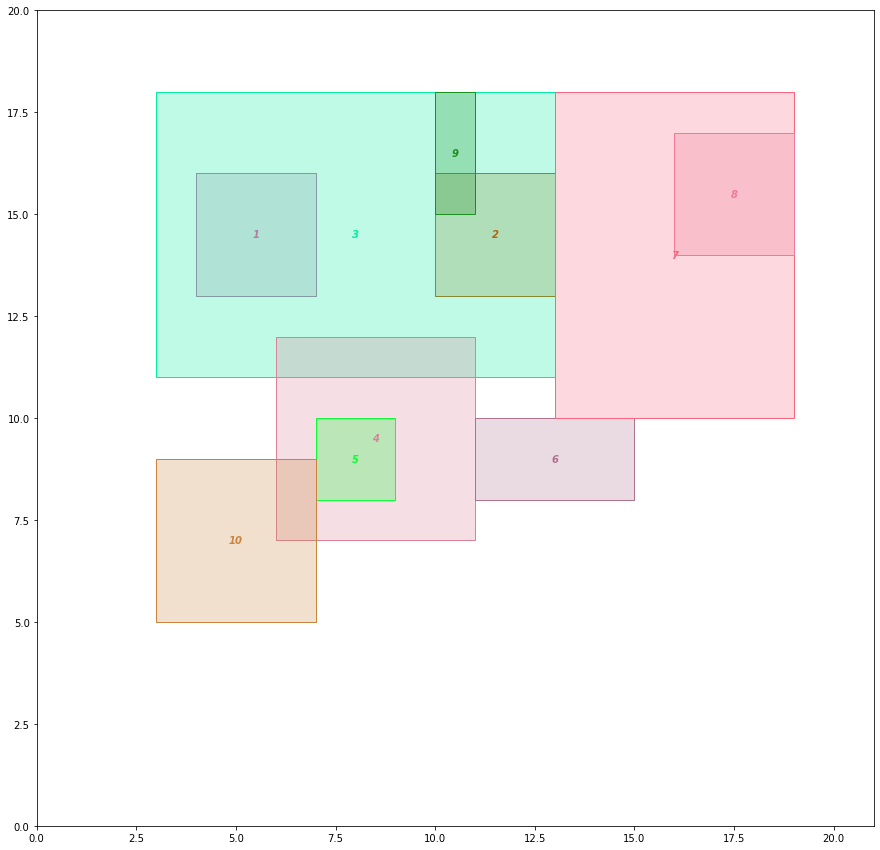

In [329]:
plot_rect(rect_data)

In [330]:
#Question 1
points_enclosing_rect(rect_data)

x coordinate: 6
y coordinate: 8
Rectangles containing the given point:  [4, 10]


In [331]:
#Question 2
non_overlapping_rect(rect_data)

Non-Overlapping rectangles: [6]


In [332]:
#Question 3
overlapping_rect(rect_data)

List of overlapping Rectangles: 
[1, 3]
[2, 3, 9]
[3, 1, 2, 4, 9]
[4, 3, 5, 10]
[5, 4]
[6]
[7, 8]
[8, 7]
[9, 2, 3]
[10, 4]


In [333]:
#Question 4
containing_rect(rect_data)

List of Rectangles contained in other rectangles: 
[1]
[2]
[3, 1, 2, 9]
[4, 5]
[5]
[6]
[7, 8]
[8]
[9]
[10]


In [334]:
#Question 5
abutting_rect(rect_data)

Abutting Rectangles: 
[2, ['e', 7]]
[3, ['e', 7]]
[4, ['e', 6]]
[5, ['w', 10]]
[6, ['n', 7], ['w', 4]]
[7, ['s', 6], ['w', 2, 3]]
[10, ['e', 5]]


In [335]:
#to obtain individual results:

#  To take a file as input:  read_data('filename.txt')
#  For plotting: plot_rect(rect_data)
#  For finfing rectangles that encloses the given point(you will be promted to input ponits):  points_enclosing_rect(rect_data)
#  To obtain list of Rectngles that are not overlapping with any other retangles:  non_overlapping_rect(rect_data)
#  To obtain list of rectangles and corresponing list of rectangles overlapping with it:  overlapping_rect(rect_data)
#  To obtained list of rectangles and the rectangles contained in it:  containing_rect(rect_data)
#  To obtain list of rectangles and rectangles abutting it with directions:  abutting_rect(rect_data)

#  For plotting all the questions+plot together:  auto(rect_data)